AN_INCOME (Income Quintile)<br>
0: No income<br>
1: Lowest quintile<br>
2: Next lowest quintile<br>
3: Mid-level quintile<br>
4: Next to highest quintile<br>
5: Highest quintile<br>


STUDY (Educational Attainment)<br>
1: No formal qualification or below ISCED 1<br>
2: ISCED 1<br>
3: ISCED 2<br>
4: ISCED 3C shorter than 2 years<br>
5: ISCED 3C 2 years or more<br>
6: ISCED 3A-B<br>
7: ISCED 3 (without distinction A-B-C, 2 years or more)<br>
8: ISCED 4C<br>
9: ISCED 4A-B<br>
10: ISCED 4 (without distinction A-B-C)<br>
11: ISCED 5B<br>
12: ISCED 5A, bachelor degree<br>
13: ISCED 5A, master degree<br>
14: ISCED 6<br>
15: Foreign qualification<br>
16: ISCED 5A bachelor degree, 5A master degree, and 6 (without distinction)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,AGE_R,CNT_BRTH,YEARS_IN_COUNTRY,AN_INCOME,STUDY,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,...,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10
0,43,826,3,1.0,6,249.15328,282.95471,280.24149,276.34540,267.82443,...,302.59970,311.42115,314.53748,294.34328,303.08398,323.10176,324.70154,298.31421,321.04885,343.28651
1,38,826,3,4.0,16,338.65711,337.36714,299.67466,342.14808,374.19576,...,362.85444,320.38337,299.65825,301.78433,357.89233,306.66095,300.27502,347.67840,285.59191,262.62323
2,33,826,3,3.0,6,281.70169,312.82408,257.12060,331.65061,274.53969,...,274.07271,307.59821,248.76410,318.32205,307.85720,304.99206,297.17619,285.27104,303.38684,311.18932
3,23,826,3,NaN,6,279.62135,259.02297,243.63725,237.03692,243.22335,...,243.51198,235.25373,248.88062,231.41455,224.67556,231.15309,228.81724,209.96691,224.49589,233.68854
4,45,826,3,NaN,11,287.28636,271.44487,265.21736,284.32781,246.23145,...,245.57977,216.70033,232.22047,274.32714,216.38875,245.31029,224.08647,234.93759,273.82176,235.05194


In [3]:
df = df.drop('CNT_BRTH', axis =1)

In [4]:
income_mode = df['AN_INCOME'].mode()[0]
df['AN_INCOME'].fillna(income_mode, inplace=True)
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8806 entries, 0 to 8891
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE_R             8806 non-null   int64  
 1   YEARS_IN_COUNTRY  8806 non-null   object 
 2   AN_INCOME         8806 non-null   float64
 3   STUDY             8806 non-null   int64  
 4   PVLIT1            8806 non-null   float64
 5   PVLIT2            8806 non-null   float64
 6   PVLIT3            8806 non-null   float64
 7   PVLIT4            8806 non-null   float64
 8   PVLIT5            8806 non-null   float64
 9   PVLIT6            8806 non-null   float64
 10  PVLIT7            8806 non-null   float64
 11  PVLIT8            8806 non-null   float64
 12  PVLIT9            8806 non-null   float64
 13  PVLIT10           8806 non-null   float64
 14  PVNUM1            8806 non-null   float64
 15  PVNUM2            8806 non-null   float64
 16  PVNUM3            8806 non-null   float64


In [6]:
df['Avg_Literacy'] = df[[f'PVLIT{i}' for i in range(1, 11)]].mean(axis=1)
df['Avg_Numeracy'] = df[[f'PVNUM{i}' for i in range(1, 10)]].mean(axis=1)
df

,AGE_R,YEARS_IN_COUNTRY,AN_INCOME,STUDY,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,PVLIT6,...,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,Avg_Literacy,Avg_Numeracy
0,43,3,1.0,6,249.15328,282.95471,280.24149,276.34540,267.82443,302.01676,...,314.53748,294.34328,303.08398,323.10176,324.70154,298.31421,321.04885,343.28651,279.975659,310.350217
1,38,3,4.0,16,338.65711,337.36714,299.67466,342.14808,374.19576,325.87766,...,299.65825,301.78433,357.89233,306.66095,300.27502,347.67840,285.59191,262.62323,328.724963,320.308778
2,33,3,3.0,6,281.70169,312.82408,257.12060,331.65061,274.53969,296.60176,...,248.76410,318.32205,307.85720,304.99206,297.17619,285.27104,303.38684,311.18932,294.926758,294.160044
3,23,3,2.0,6,279.62135,259.02297,243.63725,237.03692,243.22335,228.97831,...,248.88062,231.41455,224.67556,231.15309,228.81724,209.96691,224.49589,233.68854,249.677800,230.907730
4,45,3,2.0,11,287.28636,271.44487,265.21736,284.32781,246.23145,255.46285,...,232.22047,274.32714,216.38875,245.31029,224.08647,234.93759,273.82176,235.05194,269.488350,240.374730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,26,1,2.0,16,245.85295,248.57977,279.22924,265.78933,278.64140,261.68622,...,258.90515,245.16558,263.37539,268.28695,258.32734,260.89856,251.17799,258.10123,266.397758,253.947813
8888,59,3,3.0,16,293.41688,276.22186,315.33534,260.54601,300.71461,334.06397,...,300.99130,269.19479,314.36647,315.82621,313.25455,280.54289,306.85962,272.05988,300.552430,298.511940
8889,23,3,2.0,5,279.44253,284.87783,275.75051,287.81666,275.35968,290.26248,...,273.41846,294.50310,284.19111,290.03238,272.17914,286.30929,286.78076,273.91887,280.318941,282.113333
8890,64,3,2.0,11,280.41730,282.27713,271.81708,291.59840,271.11038,298.87793,...,238.44712,290.94839,255.37974,308.32758,238.22621,264.30771,284.90041,245.39512,280.453102,264.891946


In [7]:
df.columns

Index(['AGE_R', 'YEARS_IN_COUNTRY', 'AN_INCOME', 'STUDY', 'PVLIT1', 'PVLIT2',
       'PVLIT3', 'PVLIT4', 'PVLIT5', 'PVLIT6', 'PVLIT7', 'PVLIT8', 'PVLIT9',
       'PVLIT10', 'PVNUM1', 'PVNUM2', 'PVNUM3', 'PVNUM4', 'PVNUM5', 'PVNUM6',
       'PVNUM7', 'PVNUM8', 'PVNUM9', 'PVNUM10', 'Avg_Literacy',
       'Avg_Numeracy'],
      dtype='object')

In [8]:
df = df[['AGE_R', 'YEARS_IN_COUNTRY', 'AN_INCOME', 'STUDY', 'Avg_Literacy',
       'Avg_Numeracy', 'PVLIT1', 'PVLIT2', 'PVLIT3', 'PVLIT4', 'PVLIT5', 'PVLIT6', 
       'PVLIT7', 'PVLIT8', 'PVLIT9','PVLIT10', 'PVNUM1', 'PVNUM2', 'PVNUM3', 
       'PVNUM4', 'PVNUM5', 'PVNUM6','PVNUM7', 'PVNUM8', 'PVNUM9', 'PVNUM10']]

In [9]:
data = df.copy()
df = df[['AGE_R', 'YEARS_IN_COUNTRY', 'AN_INCOME', 'STUDY', 'Avg_Literacy',
       'Avg_Numeracy']]
df

,AGE_R,YEARS_IN_COUNTRY,AN_INCOME,STUDY,Avg_Literacy,Avg_Numeracy
0,43,3,1.0,6,279.975659,310.350217
1,38,3,4.0,16,328.724963,320.308778
2,33,3,3.0,6,294.926758,294.160044
3,23,3,2.0,6,249.677800,230.907730
4,45,3,2.0,11,269.488350,240.374730
...,...,...,...,...,...,...
8887,26,1,2.0,16,266.397758,253.947813
8888,59,3,3.0,16,300.552430,298.511940
8889,23,3,2.0,5,280.318941,282.113333
8890,64,3,2.0,11,280.453102,264.891946


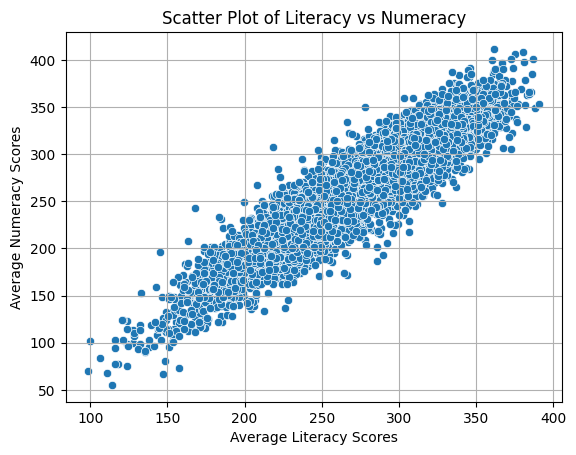

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
sns.scatterplot(x='Avg_Literacy', y='Avg_Numeracy', data=df)
plt.title('Scatter Plot of Literacy vs Numeracy')
plt.xlabel('Average Literacy Scores')
plt.ylabel('Average Numeracy Scores')
plt.grid(True)
plt.show()

In [11]:
df = df[df['STUDY'].between(1, 16)]
df = df[df['AN_INCOME'].between(0, 7)]
df

,AGE_R,YEARS_IN_COUNTRY,AN_INCOME,STUDY,Avg_Literacy,Avg_Numeracy
0,43,3,1.0,6,279.975659,310.350217
1,38,3,4.0,16,328.724963,320.308778
2,33,3,3.0,6,294.926758,294.160044
3,23,3,2.0,6,249.677800,230.907730
4,45,3,2.0,11,269.488350,240.374730
...,...,...,...,...,...,...
8887,26,1,2.0,16,266.397758,253.947813
8888,59,3,3.0,16,300.552430,298.511940
8889,23,3,2.0,5,280.318941,282.113333
8890,64,3,2.0,11,280.453102,264.891946


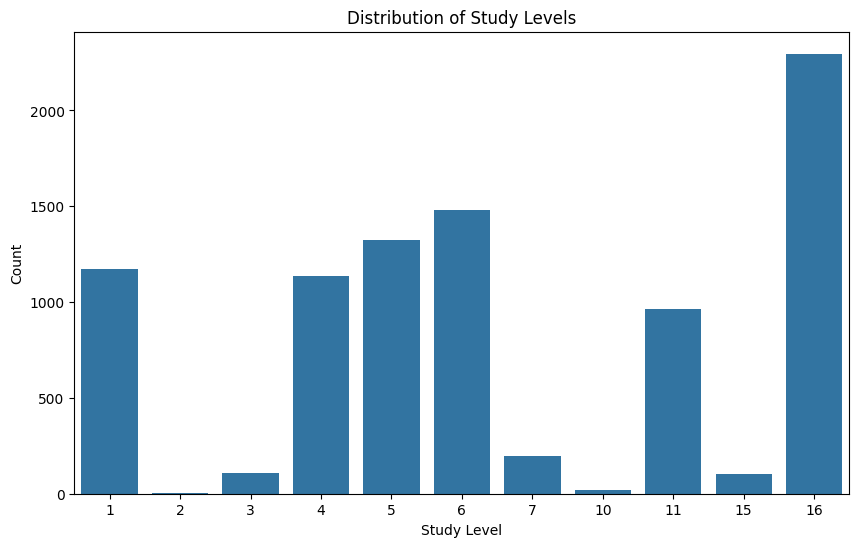

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the "study" variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='STUDY')
plt.title('Distribution of Study Levels')
plt.xlabel('Study Level')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

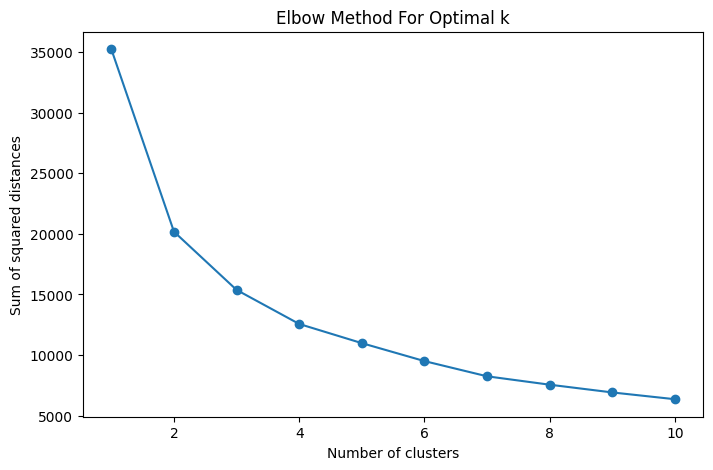

In [13]:
features = ['AN_INCOME', 'STUDY', 'Avg_Literacy', 'Avg_Numeracy']

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Calculate SSE for a range of cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


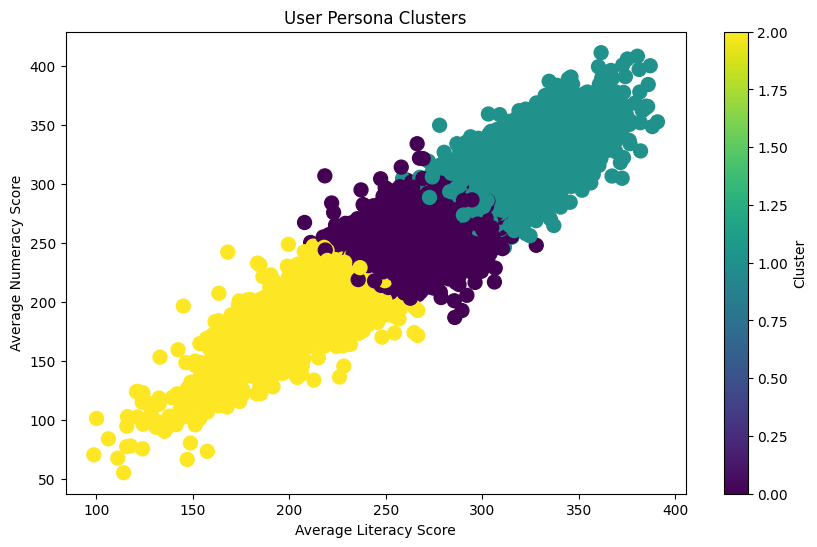

Cluster Centers in Original Scale:
   AN_INCOME      STUDY  Avg_Literacy  Avg_Numeracy
0   2.295316   7.141307    267.917353    255.863520
1   3.252858  12.049765    317.733863    312.541149
2   2.063322   4.479299    211.975816    193.506737
Cluster Centers with Ranges:
  AN_INCOME  STUDY  Avg_Literacy  Avg_Numeracy
0       1-3    4-8    267.917353    255.863520
1       2-4  11-16    317.733863    312.541149
2       1-3    1-5    211.975816    193.506737


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example DataFrame
# Assuming your DataFrame 'df' has columns: 'AN_INCOME', 'STUDY', 'Avg_Literacy', 'Avg_Numeracy'

# Select relevant features for clustering
features = ['AN_INCOME', 'STUDY', 'Avg_Literacy', 'Avg_Numeracy']

# Define weights
weights = {
    'AN_INCOME': 1,
    'STUDY': 1,
    'Avg_Literacy': 2,
    'Avg_Numeracy': 2
}

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply weights
weighted_features = scaled_features * np.array([weights[feature] for feature in features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(weighted_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_Literacy'], df['Avg_Numeracy'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Average Literacy Score')
plt.ylabel('Average Numeracy Score')
plt.title('User Persona Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Display cluster centers in original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_ / np.array([weights[feature] for feature in features]))
original_centers_df = pd.DataFrame(original_centers, columns=features)
print("Cluster Centers in Original Scale:")
print(original_centers_df)

# Define the function to map values to ranges
def map_to_range(value, ranges):
    for range_min, range_max in ranges:
        if range_min <= value <= range_max:
            return f"{range_min}-{range_max}"
    return "Out of range"

# Define the ranges for income and study
income_ranges = [(0, 1), (1, 3), (2, 4), (3, 5), (4, 5)]
study_ranges = [(1, 5), (4, 8), (6, 10), (9, 12), (11, 16)]

# Get the original cluster centers in the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_ / np.array([weights[feature] for feature in features]))

# Map cluster centers to the defined ranges
mapped_centers_with_ranges = []
for center in cluster_centers:
    income_range = map_to_range(center[0], income_ranges)
    study_range = map_to_range(center[1], study_ranges)
    mapped_centers_with_ranges.append([income_range, study_range, center[2], center[3]])

# Convert to a DataFrame for better readability
mapped_centers_with_ranges_df = pd.DataFrame(mapped_centers_with_ranges, columns=['AN_INCOME', 'STUDY', 'Avg_Literacy', 'Avg_Numeracy'])

print("Cluster Centers with Ranges:")
print(mapped_centers_with_ranges_df)


In [18]:
df

,AGE_R,YEARS_IN_COUNTRY,AN_INCOME,STUDY,Avg_Literacy,Avg_Numeracy,Cluster
0,43,3,1.0,6,279.975659,310.350217,0
1,38,3,4.0,16,328.724963,320.308778,1
2,33,3,3.0,6,294.926758,294.160044,1
3,23,3,2.0,6,249.677800,230.907730,0
4,45,3,2.0,11,269.488350,240.374730,0
...,...,...,...,...,...,...,...
8887,26,1,2.0,16,266.397758,253.947813,0
8888,59,3,3.0,16,300.552430,298.511940,1
8889,23,3,2.0,5,280.318941,282.113333,0
8890,64,3,2.0,11,280.453102,264.891946,0


In [20]:
result = df.groupby('Cluster')[['Avg_Literacy', 'Avg_Numeracy']].min().reset_index()
result

,Cluster,Avg_Literacy,Avg_Numeracy
0,0,207.888985,186.924928
1,1,258.680716,246.555052
2,2,98.654372,55.164324


In [30]:
def assign_cluster(new_user_data, kmeans, scaler, weights):
    # Scale the new user data
    new_user_scaled = scaler.transform(new_user_data)
    
    # Apply weights to the new user data
    new_user_weighted = new_user_scaled * np.array([weights[feature] for feature in features])
    
    # Calculate distances to each centroid
    distances = kmeans.transform(new_user_weighted)
    
    # Assign the new user to the nearest cluster
    cluster_assignment = np.argmin(distances)
    
    return cluster_assignment


new_user = np.array([[4, 8, 290, 245]])
cluster = assign_cluster(new_user, kmeans, scaler, weights)
print(f'The new user belongs to cluster: {cluster}')

# Map the new user's cluster to the defined ranges
new_user_cluster_center = cluster_centers[cluster]
new_user_income_range = map_to_range(new_user_cluster_center[0], income_ranges)
new_user_study_range = map_to_range(new_user_cluster_center[1], study_ranges)

print(f'New user falls into Income range: {new_user_income_range}, Study range: {new_user_study_range}')

The new user belongs to cluster: 0
New user falls into Income range: 1-3, Study range: 4-8


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
